In [41]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

In [42]:
url="https://covid19.isciii.es/resources/serie_historica_acumulados.csv"
t=requests.get(url).text
s=t.split("NOTA")[0]

In [43]:
#df=pd.read_csv('serie_historica_acumulados.csv', parse_dates=True)

In [49]:
df=pd.read_csv(io.StringIO(s), parse_dates=True)

In [50]:
df.fillna(0, inplace=True)

In [51]:
df['FECHA'] = pd.to_datetime(df['FECHA'],dayfirst=True)

In [53]:
df

,CCAA,FECHA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados
0,AN,2020-02-20,0.0,0.0,0.0,0.0,0.0
1,AR,2020-02-20,0.0,0.0,0.0,0.0,0.0
2,AS,2020-02-20,0.0,0.0,0.0,0.0,0.0
3,IB,2020-02-20,1.0,0.0,0.0,0.0,0.0
4,CN,2020-02-20,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
983,ML,2020-04-11,98.0,43.0,3.0,2.0,18.0
984,MC,2020-04-11,1449.0,537.0,91.0,97.0,344.0
985,NC,2020-04-11,3969.0,1663.0,124.0,232.0,650.0
986,PV,2020-04-11,10772.0,5547.0,459.0,804.0,4867.0


In [54]:
df = df.groupby('FECHA')['Recuperados'].sum().to_frame()

In [56]:
df=df.sort_values(by='Recuperados')

In [58]:
df['Index'] = range(1, len(df) + 1)

In [60]:
df=df.set_index('Index')

In [61]:
df['Dif. Recuperados'] = df['Recuperados'] - df['Recuperados'].shift(1)

In [63]:
df.fillna(0, inplace=True)

In [64]:
df.drop('Recuperados', axis=1, inplace=True)

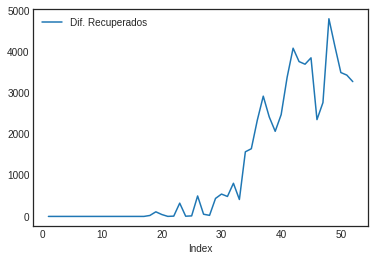

In [66]:
df.plot()

In [67]:
yData=df[df['Dif. Recuperados']>0].to_numpy()
yData=yData.reshape(yData.size)
xData=np.arange(yData.size)

In [68]:
yData

array([2.300e+01, 1.120e+02, 4.600e+01, 1.000e+00, 7.000e+00, 3.230e+02,
       5.000e+00, 1.300e+01, 4.980e+02, 5.300e+01, 2.600e+01, 4.380e+02,
       5.440e+02, 4.860e+02, 8.070e+02, 4.120e+02, 1.573e+03, 1.648e+03,
       2.342e+03, 2.928e+03, 2.423e+03, 2.072e+03, 2.479e+03, 3.388e+03,
       4.096e+03, 3.770e+03, 3.706e+03, 3.861e+03, 2.357e+03, 2.771e+03,
       4.813e+03, 4.144e+03, 3.503e+03, 3.441e+03, 3.282e+03])

In [69]:
#Example of regression function - Polynomial
#def func(x, a ,b, c, d):
#    return a*np.exp(b*x)
#    return a+ b*x + c*pow(x,2)+ d*pow(x,3) #+ e*pow(x,4) + f*pow(x,5) + g*pow(x,6)

In [70]:
#Example of regression function
#def func(x, amp, cen, wid):
#    return amp * np.exp(-(x-cen)**2 / wid)

In [71]:
#Regression function - skew normal
def func(x, sigmag, mu, alpha,a):
    c = 0
    #normal distribution
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*a*normpdf*normcdf + c

In [72]:
popt, pcov = curve_fit(func, xData, yData, p0=(1,1,1,20000))
print(popt)
print(pcov)

[1.20816854e+00 1.73382149e-01 6.78037656e+00 2.14069537e+02]
[[ 6.24222918e+04 -1.44785704e+05  6.01257127e+06  2.33609798e+07]
 [-1.44785704e+05  3.42444839e+05 -1.42135225e+07 -5.51255079e+07]
 [ 6.01257127e+06 -1.42135225e+07  5.90200243e+08  2.28861041e+09]
 [ 2.33609798e+07 -5.51255079e+07  2.28861041e+09  8.89615501e+09]]


In [73]:
xFit = np.arange(0.0, yData.size + 10, 1)

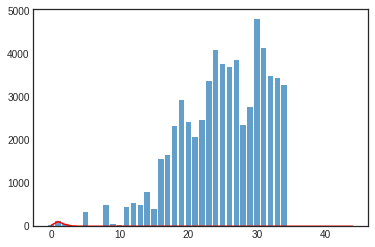

In [74]:
plt.style.use('seaborn-white')
plt.bar(xData, yData, align='center', alpha=0.7)
plt.plot(xFit, func(xFit, *popt), 'r')
plt.show()

In [75]:
#Prediction for the next day:
int(func(yData.size, *popt))

0